**DIABETES PREDICTION**


**DATASET INFORMATION**


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Source**: This dataset may have been sourced from various medical institutions, research studies, or publicly available health databases.

**Purpose**: The dataset is likely collected for predictive analytics, aiming to develop models that can accurately predict the likelihood of diabetes based on various factors.

**Attributes**: Typical attributes in such a dataset may include:

1.Age

2.Body Mass Index (BMI)

3.Blood Pressure

4.Insulin levels

5.Glucose levels

6.Family history of diabetes

7.Physical activity level

8.Dietary habits

9.Blood tests results (e.g., HbA1c levels)



**Target Variable**: The target variable is likely binary, indicating the presence or absence of diabetes.

**IMPORTING MODULES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('diabetes.csv')

In [ ]:
#display shape of data
df.shape

(768, 9)

In [ ]:
#display top 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#display last 5 rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
#check if any null values in dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**INFORMATION ABOUT DATASET**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**STATISTICS ABOUT DATA SET**

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df1=df.copy(deep=True)

In [ ]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Store Feature Matrix in X and Response[Target] in Vector Y**

In [57]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

**Splitting Dataset into Train Set and Test Set**

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                               random_state=42)

**Scikit_Learn Pipeline**

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

In [61]:
pipeline_lr  = Pipeline([('scalar1',StandardScaler()),
                         ('lr_classifier',LogisticRegression())])

pipeline_knn = Pipeline([('scalar2',StandardScaler()),
                          ('knn_classifier',KNeighborsClassifier())])

pipeline_svc = Pipeline([('scalar3',StandardScaler()),
                         ('svc_classifier',SVC())])

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(max_depth=3))])
pipeline_gbc = Pipeline([('gbc_classifier',GradientBoostingClassifier())])


In [62]:
pipelines = [pipeline_lr,
            pipeline_knn,
            pipeline_svc,
            pipeline_dt,
            pipeline_rf,
            pipeline_gbc]

In [63]:
pipelines

[Pipeline(steps=[('scalar1', StandardScaler()),
                 ('lr_classifier', LogisticRegression())]),
 Pipeline(steps=[('scalar2', StandardScaler()),
                 ('knn_classifier', KNeighborsClassifier())]),
 Pipeline(steps=[('scalar3', StandardScaler()), ('svc_classifier', SVC())]),
 Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())]),
 Pipeline(steps=[('rf_classifier', RandomForestClassifier(max_depth=3))]),
 Pipeline(steps=[('gbc_classifier', GradientBoostingClassifier())])]

In [64]:

for pipe in pipelines:
    pipe.fit(X_train,y_train)


In [65]:
pipe_dict = {0:'LR',
             1:'KNN',
             2:'SVC',
             3:'DT',
             4: 'RF',
             5: 'GBC'}

In [66]:
pipe_dict

{0: 'LR', 1: 'KNN', 2: 'SVC', 3: 'DT', 4: 'RF', 5: 'GBC'}

In [67]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,Y_test)*100))

LR Test Accuracy:75.32467532467533
KNN Test Accuracy:69.48051948051948
SVC Test Accuracy:73.37662337662337
DT Test Accuracy:74.67532467532467
RF Test Accuracy:79.22077922077922
GBC Test Accuracy:74.67532467532467


In [80]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [81]:
rf =RandomForestClassifier(max_depth=3)
rf.fit(X,y)

RandomForestClassifier(max_depth=3)

**CORRELATION**

In [ ]:
#get correlation of each features in dataset
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

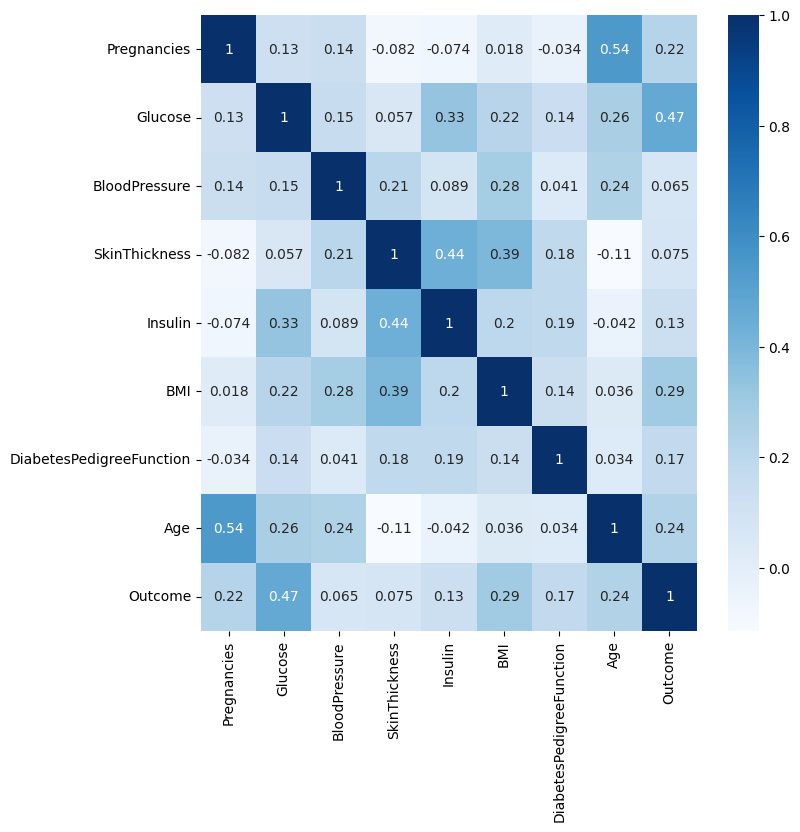

In [76]:
import seaborn as sns
fig,ax= plt.subplots(figsize=[8,8])
sns.heatmap(df.corr() ,annot=True,ax=ax,cmap='Blues')

**PREDICTION ON NEW DATA**

In [77]:
new_data = pd.DataFrame({
    'Pregnancies':6,
    'Glucose':148.0,
    'BloodPressure':72.0,
    'SkinThickness':35.0,
    'Insulin':79.799479,
    'BMI':33.6,
    'DiabetesPedigreeFunction':0.627,
    'Age':50,
},index=[0])

In [82]:
p = rf.predict(new_data)

In [83]:
if p[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')

diabetic
